# Introduction

The goal of this notebook is to explore how the real world is projected onto two-dimensional screens.

This investigation is dynamic and the learning is on-the-go.

Ultimately, the endgoal is two project 3D coordinates onto a 2D screen, as seen from the perspective of a viewer located anywhere and looking in any direction.


# Camera view

The camera view, defined by position and direction, is a very critical part of projecting points. This definition can be done in multiple ways. It is still not 100% clear to me which are the best ways to do this. Let us explore.


# Airplane references

The Aircraft industry is well known for defining spatial coordinates. Namely, we can talk about aircraft reference angles, commonly known as roll, pitch and yaw. Scientifically, they are know as Tait–Bryan angles.



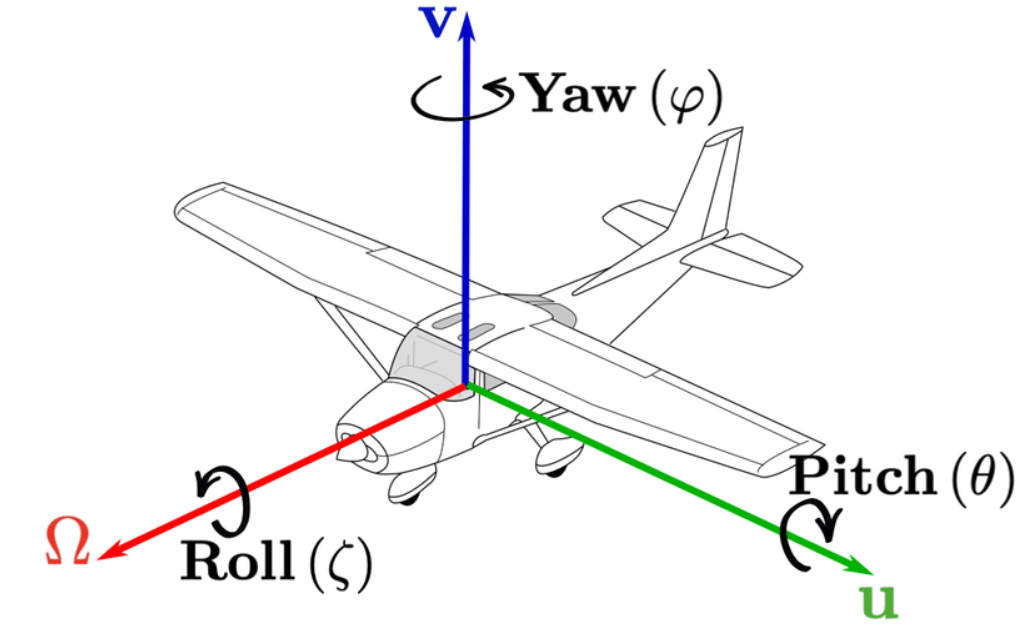

In [1]:
from IPython import display
display.Image("img/rollpitchyaw.png")

![alt text](img/rollpitchyaw.png)

<img src="img/rollpitchyaw.PNG">


%%html
<img src="img/rollpitchyaw.png", width = 200, height = 200>

<div>
<img src="/files/img/rollpitchyaw.png" width="500"/>
</div>

<img src="img\rollpitchyaw.png" width="400" />

![](img/rollpitchyaw.png)


| Axis | Angle name | Color | Variable | Symbol | Greek letter |
| --- | --- | --- | --- | --- | --- |
| x | Roll | Red | u | $ \phi $ | Phi |
| y | Pitch | Green | v | $ \theta $ | Theta |
| z | Yaw | Blue | w | $ \psi $ | Psi |


# Tait-Bryan Angles

At a first glance, it seems to me that Tait-Bryan Angles have similarities to spherical coordinates.

<img src="img/taitbryan.png" width="400" />


# Euler angles

<img src="img/Eulerangles.png" width="400" />


# Spherical coordinates

<img src="img/spherical_coordinates_cartesian.png" width="400" />




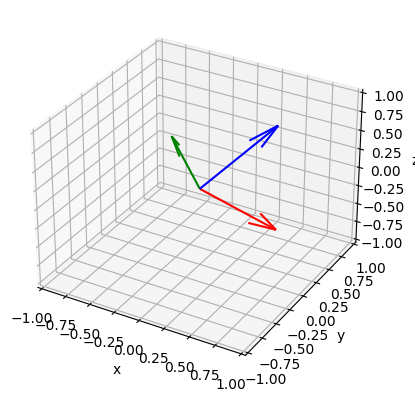

In [3]:
# Import numpy for number processing and define display options (suppress applies to near-zero numbers)
import numpy as np
np.set_printoptions(precision=2, suppress=True)

# Import this line to allow zoom and pan in Jupyter Notebook (which for some reason stopped working)
# %matplotlib widget
import matplotlib.pyplot as plt


def spherical_to_cartesian(r, theta, phi):
    """
    Convert spherical coordinates (r, theta, phi) to Cartesian coordinates (x, y, z).

    Parameters:
    r (float): Radius, distance from origin to the point
    theta (float): Polar angle (in radians), angle from the positive z-axis
    phi (float): Azimuthal angle (in radians), angle from the positive x-axis in the xy-plane

    Returns:
    tuple: (x, y, z) Cartesian coordinates
    """
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    
    return x, y, z


r = 1.
phi = np.radians(45)
theta = np.radians(45)

ex = spherical_to_cartesian(r, theta, phi+np.radians(90))
ey = spherical_to_cartesian(r, theta+np.radians(90), np.radians(90))
ez = spherical_to_cartesian(r, theta, phi)

camera = np.array((
    (0, 0, 0, *ex),
    (0, 0, 0, *ey),
    (0, 0, 0, *ez),
))

ax = plt.figure().add_subplot(projection='3d')
ax.quiver(*camera.T, colors=['r', 'g', 'b', 'r', 'r', 'g', 'g', 'b', 'b'])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [2]:
# from ipywidgets import interact

# @interact(x=(0,100))
# def double_number(x):
#     print("The double of %d is %d." % (x, x*2))